In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score

from nltk.stem import WordNetLemmatizer

In [2]:
FILE_PATH = "data.csv"
df = pd.read_csv(FILE_PATH)

# Display the first few rows to understand the structure
print(df.head())

   index                      title    genre  \
0      0          Drowned Wednesday  fantasy   
1      1              The Lost Hero  fantasy   
2      2  The Eyes of the Overworld  fantasy   
3      3            Magic's Promise  fantasy   
4      4             Taran Wanderer  fantasy   

                                             summary  
0   Drowned Wednesday is the first Trustee among ...  
1   As the book opens, Jason awakens on a school ...  
2   Cugel is easily persuaded by the merchant Fia...  
3   The book opens with Herald-Mage Vanyel return...  
4   Taran and Gurgi have returned to Caer Dallben...  


In [3]:
df = df.drop('index', axis=1)

C:\Users\dharm\AppData\Local\Temp\ipykernel_6640\3366689856.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")


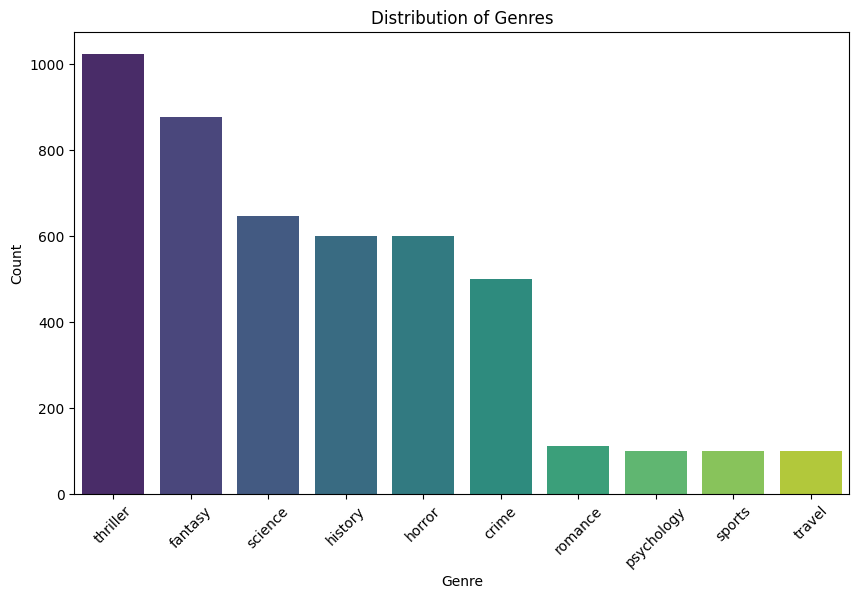

In [4]:
genre_counts = df['genre'].value_counts()

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.index, y=genre_counts.values, palette="viridis")
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

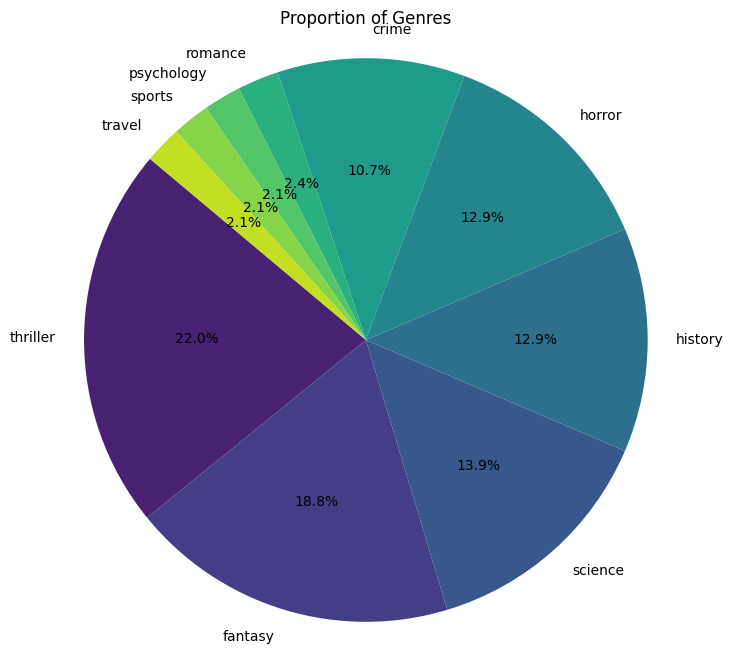

In [5]:
# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis", len(genre_counts)))
plt.title('Proportion of Genres')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


In [6]:
# Convert 'genre' to categorical values and then to numeric labels
df['genre'] = df['genre'].astype('category')
df['genre_label'] = df['genre'].cat.codes

# Create a mapping of genre to genre_label
genre_mapping = dict(enumerate(df['genre'].cat.categories))

# Invert the mapping to make it from label to genre
label_to_genre = {v: k for k, v in genre_mapping.items()}

# Print the mapping
print("Genre to Label Mapping:")
print(genre_mapping)

print("\nLabel to Genre Mapping:")
print(label_to_genre)


Genre to Label Mapping:
{0: 'crime', 1: 'fantasy', 2: 'history', 3: 'horror', 4: 'psychology', 5: 'romance', 6: 'science', 7: 'sports', 8: 'thriller', 9: 'travel'}

Label to Genre Mapping:
{'crime': 0, 'fantasy': 1, 'history': 2, 'horror': 3, 'psychology': 4, 'romance': 5, 'science': 6, 'sports': 7, 'thriller': 8, 'travel': 9}


In [7]:
print(df.head())

                       title    genre  \
0          Drowned Wednesday  fantasy   
1              The Lost Hero  fantasy   
2  The Eyes of the Overworld  fantasy   
3            Magic's Promise  fantasy   
4             Taran Wanderer  fantasy   

                                             summary  genre_label  
0   Drowned Wednesday is the first Trustee among ...            1  
1   As the book opens, Jason awakens on a school ...            1  
2   Cugel is easily persuaded by the merchant Fia...            1  
3   The book opens with Herald-Mage Vanyel return...            1  
4   Taran and Gurgi have returned to Caer Dallben...            1  


In [8]:
df = df[['summary', 'genre_label']]

unique_genres_lables = df['genre_label'].unique()
print(unique_genres_lables)

genre_counts = df['genre_label'].value_counts()
print(genre_counts)

[1 6 0 2 3 8 4 5 7 9]
genre_label
8    1023
1     876
6     647
2     600
3     600
0     500
5     111
4     100
7     100
9     100
Name: count, dtype: int64


In [9]:
# Text Preprocessing Functions
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r"http\S+|www\S+|https\S+", '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)  # Remove user mentions
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuations
    return text

# Apply preprocessing to the 'summary' column
df['summary'] = df['summary'].apply(preprocess_text)

In [10]:
# Optional: Stopwords and Lemmatization
nltk.download('wordnet')
nltk.download('stopwords')
stopwordlist = nltk.corpus.stopwords.words('english')

[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


In [11]:
def remove_stopwords(text):
    return ' '.join([word for word in text.split() if word not in stopwordlist])

In [12]:
df['summary'] = df['summary'].apply(remove_stopwords)

lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

df['summary'] = df['summary'].apply(lemmatize_text)

In [13]:

# Train-test split
X = df['summary']
y = df['genre_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
vectorizer = CountVectorizer(max_features=10000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

X_train.head()

print("X_vec")
print(X_train_vec)

X_vec
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 436858 stored elements and shape (3725, 10000)>
  Coords	Values
  (0, 5827)	1
  (0, 1595)	1
  (0, 1340)	2
  (0, 4662)	1
  (0, 2563)	1
  (0, 6091)	1
  (0, 9638)	1
  (0, 356)	1
  (0, 3381)	1
  (0, 8547)	1
  (0, 4988)	1
  (0, 8583)	1
  (0, 4203)	1
  (0, 7893)	1
  (0, 3808)	1
  (0, 9807)	1
  (0, 3227)	1
  (0, 6845)	1
  (0, 9609)	1
  (0, 7202)	1
  (0, 7589)	1
  (0, 7426)	1
  (0, 6298)	1
  (0, 8130)	1
  (0, 6176)	1
  :	:
  (3723, 3134)	1
  (3723, 4017)	1
  (3723, 555)	1
  (3724, 9057)	1
  (3724, 2223)	1
  (3724, 9893)	1
  (3724, 863)	1
  (3724, 5333)	1
  (3724, 8853)	1
  (3724, 6802)	1
  (3724, 9690)	1
  (3724, 4117)	1
  (3724, 9216)	1
  (3724, 5633)	1
  (3724, 456)	1
  (3724, 2052)	1
  (3724, 9138)	1
  (3724, 9373)	1
  (3724, 7364)	1
  (3724, 4797)	1
  (3724, 8751)	1
  (3724, 9546)	1
  (3724, 3908)	1
  (3724, 836)	1
  (3724, 1463)	1


In [18]:
# Model 1: Multinomial Naive Bayes
model_nb = MultinomialNB()
model_nb.fit(X_train_vec, y_train)


MultinomialNB()

In [19]:
# Model 2: Stochastic Gradient Descent Classifier
model_sgd = SGDClassifier(max_iter=1000, n_jobs=-1, loss='log_loss', class_weight='balanced')
model_sgd.fit(X_train_vec, y_train)

SGDClassifier(class_weight='balanced', loss='log_loss', n_jobs=-1)

In [20]:
# Evaluate the models
y_pred_nb = model_nb.predict(X_test_vec)
y_pred_sgd = model_sgd.predict(X_test_vec)

In [21]:
# Classification Report for Multinomial Naive Bayes
print("Multinomial Naive Bayes Classification Report")
print(classification_report(y_test, y_pred_nb))


Multinomial Naive Bayes Classification Report
              precision    recall  f1-score   support

           0       0.76      0.69      0.72       109
           1       0.82      0.68      0.75       196
           2       0.74      0.75      0.74       118
           3       0.58      0.58      0.58       113
           4       0.74      0.54      0.62        26
           5       0.29      0.29      0.29        17
           6       0.67      0.74      0.70       120
           7       0.75      0.69      0.72        13
           8       0.63      0.77      0.70       198
           9       0.75      0.55      0.63        22

    accuracy                           0.69       932
   macro avg       0.67      0.63      0.65       932
weighted avg       0.70      0.69      0.69       932



In [22]:
# Classification Report for SGD Classifier
print("SGD Classifier Classification Report")
print(classification_report(y_test, y_pred_sgd))

SGD Classifier Classification Report
              precision    recall  f1-score   support

           0       0.65      0.66      0.66       109
           1       0.78      0.63      0.70       196
           2       0.78      0.74      0.76       118
           3       0.54      0.52      0.53       113
           4       0.64      0.54      0.58        26
           5       0.32      0.35      0.33        17
           6       0.65      0.66      0.66       120
           7       0.61      0.85      0.71        13
           8       0.62      0.73      0.67       198
           9       0.70      0.95      0.81        22

    accuracy                           0.66       932
   macro avg       0.63      0.66      0.64       932
weighted avg       0.67      0.66      0.66       932

